By: Dominikus Krisna Herlambang | ©2024

In [ ]:
invisible(suppressWarnings(suppressPackageStartupMessages(lapply(
  c('ncdf4','dplyr','ggplot2'),
  library, character.only = TRUE
))))

In [ ]:
isi.nc <- nc_open('Sea_Surface_Temp.nc')
isi.nc$ndims

[1] 4

In [ ]:
sapply(
  isi.nc$dim, function(input) input$name
)

isi.nc$nvars

LON381_481   LAT313_361         TIME         bnds 
"LON381_481" "LAT313_361"       "TIME"       "bnds"

[1] 2

In [ ]:
sapply(isi.nc$var, \(x) x$name) %>%
  as.vector

isi.nc

[1] "TIME_bnds" "SST"

File /content/drive/MyDrive/Ocean_Atmosfer_Visualization/R Programming/sst_jawa.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        double TIME_bnds[bnds,TIME]   
        float SST[LON381_481,LAT313_361,TIME]   
            missing_value: 9.99900026055401e+20
            _FillValue: 9.99900026055401e+20
            long_name: sea surface temperature [k]
            history: From Surface

     4 dimensions:
        LON381_481  Size:101 
            units: degrees_east
            long_name: longitude
            modulo: 360
            point_spacing: even
            axis: X
        LAT313_361  Size:49 
            units: degrees_north
            long_name: latitude
            point_spacing: even
            axis: Y
        TIME  Size:121   *** is unlimited *** 
            units: days since 0001-01-01 00:00:00
            long_name: time
            time_origin: 01-JAN-0001 00:00:00
            axis: T
            bounds: TIME_bnds
        bnds  Size:2 

[1] 101  49 121

302.0591,302.1030,302.1733,302.2456,302.3062
302.0425,302.0903,302.1558,302.2251,302.2856
302.0493,302.1138,302.1802,302.2437,302.3042
302.0884,302.1577,302.2271,302.2905,302.3423
302.1274,302.2104,302.2778,302.3228,302.3735


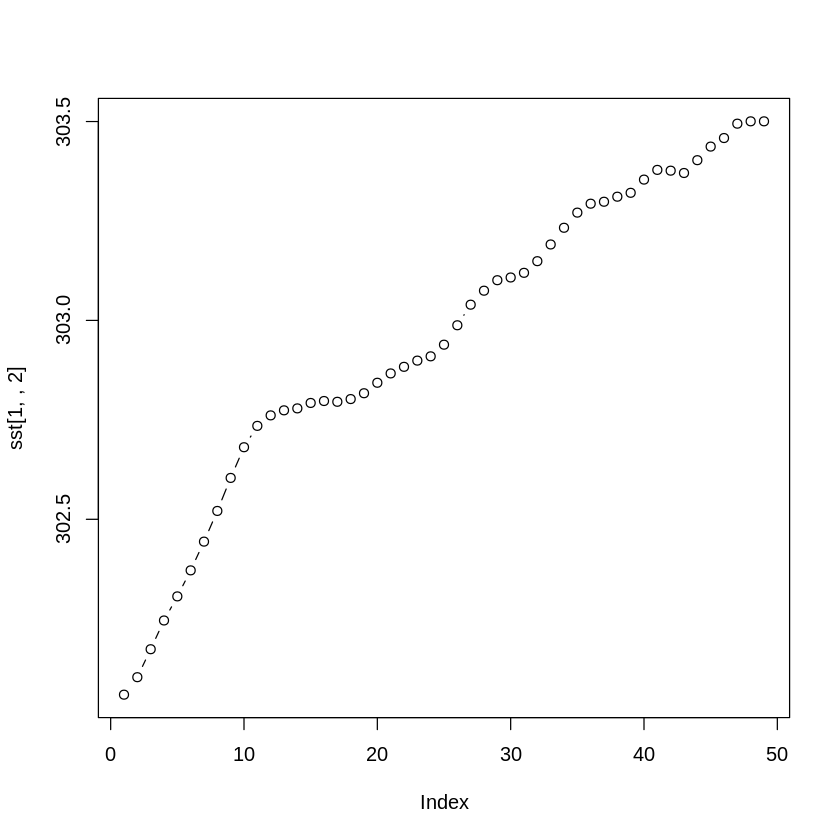

In [ ]:
sst <- ncvar_get(isi.nc, 'SST')
dim(sst)

sst[1:5, 1:5, 2]
plot(sst[1,,2], type='b')

lon <- ncvar_get(isi.nc, 'LON381_481')
lat <- ncvar_get(isi.nc, 'LAT313_361')
waktu <- ncvar_get(isi.nc, 'TIME')

In [ ]:
lon
lat
waktu

[1]  95.00  95.25  95.50  95.75  96.00  96.25  96.50  96.75  97.00  97.25
 [11]  97.50  97.75  98.00  98.25  98.50  98.75  99.00  99.25  99.50  99.75
 [21] 100.00 100.25 100.50 100.75 101.00 101.25 101.50 101.75 102.00 102.25
 [31] 102.50 102.75 103.00 103.25 103.50 103.75 104.00 104.25 104.50 104.75
 [41] 105.00 105.25 105.50 105.75 106.00 106.25 106.50 106.75 107.00 107.25
 [51] 107.50 107.75 108.00 108.25 108.50 108.75 109.00 109.25 109.50 109.75
 [61] 110.00 110.25 110.50 110.75 111.00 111.25 111.50 111.75 112.00 112.25
 [71] 112.50 112.75 113.00 113.25 113.50 113.75 114.00 114.25 114.50 114.75
 [81] 115.00 115.25 115.50 115.75 116.00 116.25 116.50 116.75 117.00 117.25
 [91] 117.50 117.75 118.00 118.25 118.50 118.75 119.00 119.25 119.50 119.75
[101] 120.00

[1] -12.00 -11.75 -11.50 -11.25 -11.00 -10.75 -10.50 -10.25 -10.00  -9.75
[11]  -9.50  -9.25  -9.00  -8.75  -8.50  -8.25  -8.00  -7.75  -7.50  -7.25
[21]  -7.00  -6.75  -6.50  -6.25  -6.00  -5.75  -5.50  -5.25  -5.00  -4.75
[31]  -4.50  -4.25  -4.00  -3.75  -3.50  -3.25  -3.00  -2.75  -2.50  -2.25
[41]  -2.00  -1.75  -1.50  -1.25  -1.00  -0.75  -0.50  -0.25   0.00

[1] 735325 735355 735386 735416 735447 735478 735508 735539 735569 735600
 [11] 735631 735659 735690 735720 735751 735781 735812 735843 735873 735904
 [21] 735934 735965 735996 736025 736056 736086 736117 736147 736178 736209
 [31] 736239 736270 736300 736331 736362 736390 736421 736451 736482 736512
 [41] 736543 736574 736604 736635 736665 736696 736727 736755 736786 736816
 [51] 736847 736877 736908 736939 736969 737000 737030 737061 737092 737120
 [61] 737151 737181 737212 737242 737273 737304 737334 737365 737395 737426
 [71] 737457 737486 737517 737547 737578 737608 737639 737670 737700 737731
 [81] 737761 737792 737823 737851 737882 737912 737943 737973 738004 738035
 [91] 738065 738096 738126 738157 738188 738216 738247 738277 738308 738338
[101] 738369 738400 738430 738461 738491 738522 738553 738581 738612 738642
[111] 738673 738703 738734 738765 738795 738826 738856 738887 738918 738947
[121] 738978

In [ ]:
data.rh <- expand.grid(
  lon = lon, lat = lat
) %>%
  data.table %>%
  .[, sst := sst[,,2] %>% as.vector]

data.rh[]

lon,lat,sst
<dbl[1d]>,<dbl[1d]>,<dbl>
95.00,-12,302.0591
95.25,-12,302.0425
95.50,-12,302.0493
95.75,-12,302.0884
96.00,-12,302.1274
96.25,-12,302.1558
96.50,-12,302.1597
96.75,-12,302.1597
97.00,-12,302.1753


In [ ]:
peta <- getMap('high') %>%
  sf::st_as_sf()

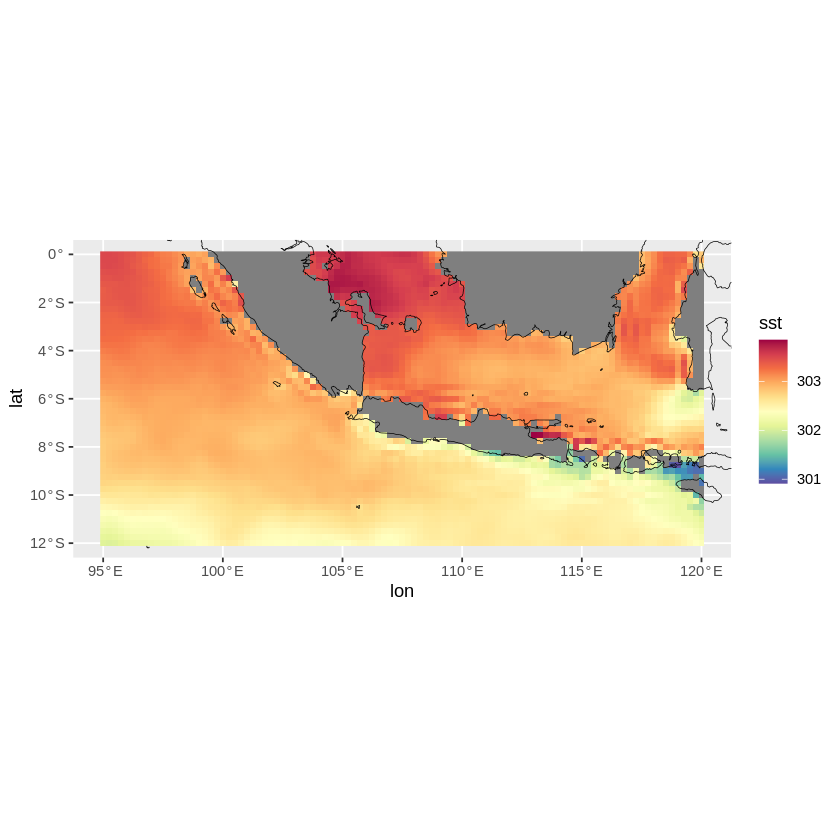

In [ ]:
ggplot() +
  geom_raster(
    aes(lon,lat,fill=sst),
    data.rh
  ) +
  geom_sf(data = peta, fill=NA, color='black') +
  scale_fill_gradientn(colors=brewer.pal(11,'Spectral') %>% rev) +
  coord_sf(xlim=data.rh[,range(lon)],ylim=data.rh[,range(lat)])